# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

!pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import ucimlrepo as uci
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
dataset = uci.fetch_ucirepo(id=149)

print(dataset.metadata.name, '\n')
print(dataset.metadata.abstract, '\n')
print(dataset.metadata.additional_info.summary, '\n')

Statlog (Vehicle Silhouettes) 

3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. 

The purpose is to classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.  

HISTORY:

This data was originally gathered at the TI in 1986-87 by JP Siebert. It was partially financed by Barr and Stroud Ltd. The original purpose was to find a method of distinguishing 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. Measures of shape features extracted from example silhouettes of objects to be discriminated were used to generate a classification rule tree by means of computer induction.

This object recognition strategy was successfully used to discriminate between silhouettes of model cars, vans and buses viewed from constrained elevati

In [4]:
data = dataset.data.features
target = dataset.data.targets

nan_indices = np.isnan(data).any(axis=1)

# # # Filter the data and target arrays
data = data[~nan_indices] # Select rows where NaN is not present
target = target[~nan_indices]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(845, 18) (845, 1)
(549, 18) (549, 1) (296, 18) (296, 1)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [5]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
205,87.0,47,81,149,62,9,147,45,19,152,171,325,181,72,0,6,188,198
16,89.0,36,51,109,52,6,118,57,17,129,137,206,125,80,2,14,181,185
693,90.0,46,75,133,55,11,160,43,20,161,173,369,171,77,0,16,182,192
524,105.0,52,107,207,60,11,218,31,24,167,221,701,197,66,0,20,191,203
193,107.0,55,98,199,59,7,240,27,26,168,258,866,245,80,3,1,186,184
656,84.0,42,76,156,64,7,151,44,19,143,179,339,157,75,0,20,187,193
573,89.0,47,80,131,54,11,160,43,20,163,175,369,174,77,1,7,182,193
720,91.0,38,76,172,61,8,167,40,20,134,196,415,145,71,0,28,189,198
532,104.0,49,105,209,61,11,207,32,24,157,217,637,168,64,0,19,193,207
116,100.0,45,100,209,65,8,201,32,23,147,231,611,189,72,5,5,189,195


Methods `describe` and `info` deliver some useful information.

In [6]:
X_train_pd.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,93.943534,45.103825,82.316940,168.814208,61.517304,8.597450,169.398907,40.867031,20.626594,148.641166,189.242259,443.167577,176.094718,72.520947,6.433515,12.249545,188.799636,195.491803
std,8.294890,6.185556,15.798391,33.393557,7.669387,4.586165,33.867918,7.914840,2.639693,14.563748,31.887427,180.637025,33.232071,7.152281,5.018001,8.772553,6.020033,7.336691
min,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,33.000000,19.000000,138.000000,168.000000,318.000000,150.000000,68.000000,2.000000,5.000000,184.000000,191.000000
50%,93.000000,44.000000,80.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,147.000000,179.000000,366.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,201.000000,46.000000,23.000000,160.000000,217.000000,602.000000,201.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,119.000000,59.000000,110.000000,322.000000,133.000000,55.000000,265.000000,61.000000,29.000000,188.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [7]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 205 to 565
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       549 non-null    float64
 1   CIRCULARITY                       549 non-null    int64  
 2   DISTANCE CIRCULARITY              549 non-null    int64  
 3   RADIUS RATIO                      549 non-null    int64  
 4   PR.AXIS ASPECT RATIO              549 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           549 non-null    int64  
 6   SCATTER RATIO                     549 non-null    int64  
 7   ELONGATEDNESS                     549 non-null    int64  
 8   PR.AXIS RECTANGULARITY            549 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         549 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  549 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  549 non-null    int64  
 12  SCALED RADI

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [8]:
### YOUR CODE HERE
from sklearn import preprocessing

normalize = preprocessing.RobustScaler()
X_train = normalize.fit_transform(X_train)
X_test = normalize.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

/home/namin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/namin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/namin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/namin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be remove

Accuracy is 0.7702702702702703.
F1 is 0.7744424831048088.


/home/namin/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

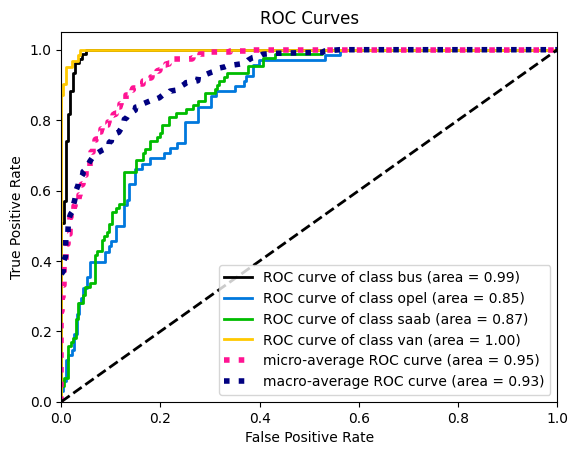

In [9]:
### YOUR CODE HERE
import sklearn
from sklearn.linear_model import LogisticRegression
from scikitplot import metrics
model = LogisticRegression(
    solver="saga", 
    multi_class="multinomial",
    tol=1e-3,
    max_iter=500,
)

params = {'penalty':['l1', 'l2'], 'C':[0.1, 0.3, 0.5, 0.7, 1.0, 1.3, 1.5, 1.7, 2.0, 2.5, 5.0]}
gs_lr = sklearn.model_selection.GridSearchCV(model, params, return_train_score=True)
gs_lr.fit(X_train, y_train)
print(f"Accuracy is {sklearn.metrics.accuracy_score(y_test, gs_lr.predict(X_test))}.")
print(f"F1 is {sklearn.metrics.f1_score(y_test, gs_lr.predict(X_test), average='macro')}.")
metrics.plot_roc(y_test, gs_lr.predict_proba(X_test))

In [10]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

! pip install scikit-plot

Defaulting to user installation because normal site-packages is not writeable


#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

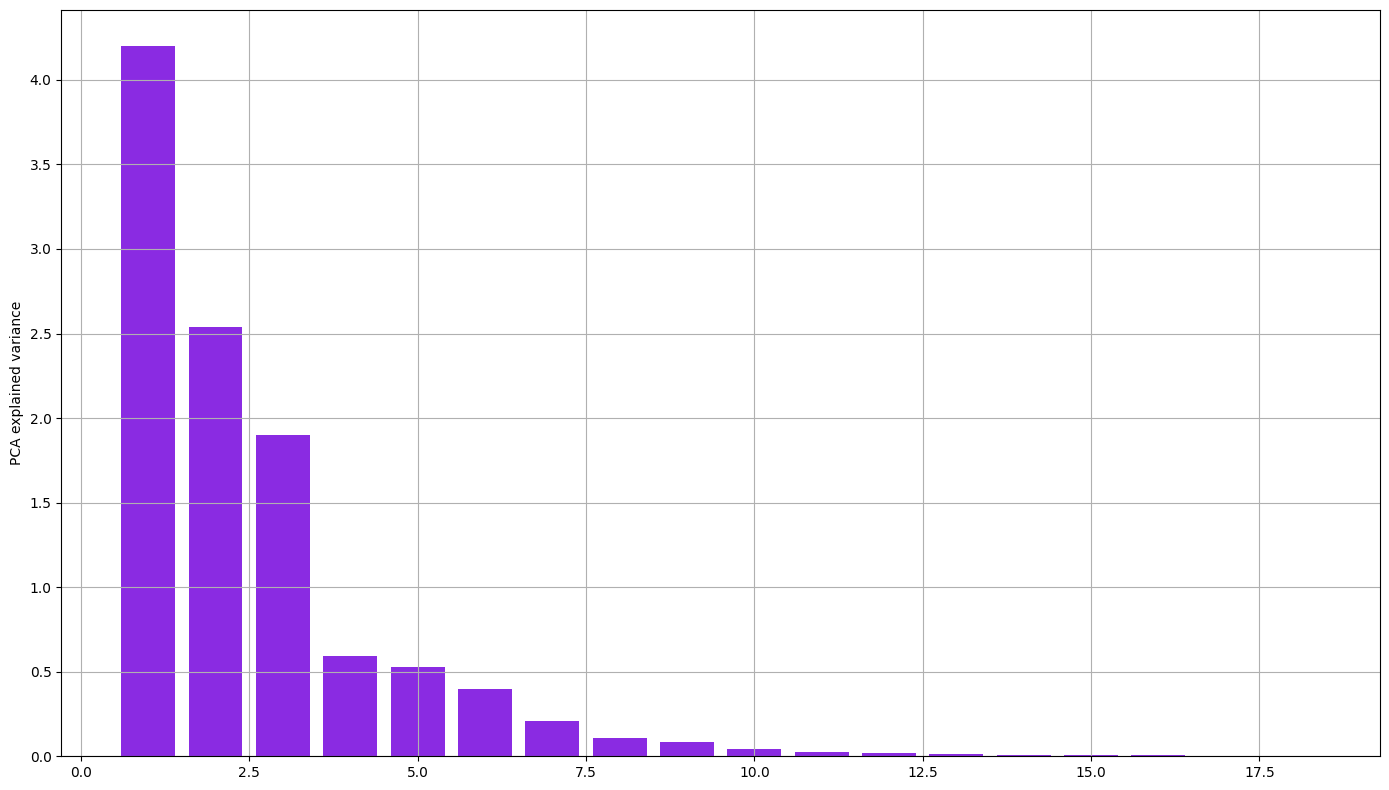

In [11]:
### YOUR CODE HERE

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(18)
pca.fit(X_train)

# make statistic plot
plt.figure(figsize=(14, 8), dpi=100)
plt.bar(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, color='blueviolet')
plt.ylabel('PCA explained variance')
plt.grid()
plt.tight_layout()
plt.show()


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

After the 9th component, the variance is low enough to justify dropping it. Normalization has already been performed beforehand, so there’s no any need to normalize the data again after PCA.

In [12]:
### YOUR CODE HERE
pca = PCA(9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca  = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

/home/namin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/namin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/namin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/namin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be remove

F1 is 0.6880751228062173 Accuracy is 0.6824324324324325


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

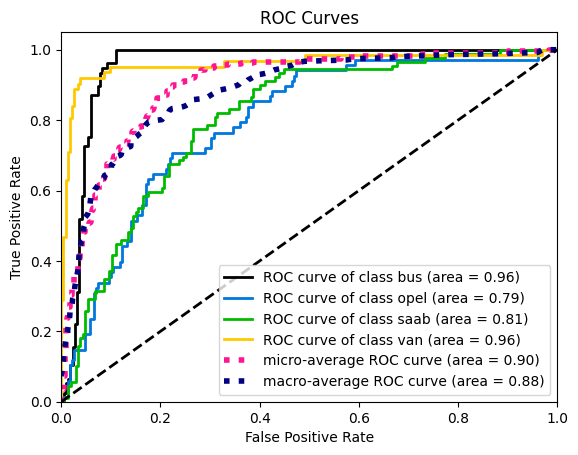

In [13]:
### YOUR CODE HERE
model = LogisticRegression(
    solver="saga", 
    tol=1e-3, 
    max_iter=500, 
    multi_class="multinomial"
)

gs_lr_pca = sklearn.model_selection.GridSearchCV(model, {'penalty':['l1', 'l2'], 'C':np.linspace(0.2, 2.0, 10)}, return_train_score=True)
gs_lr_pca.fit(X_train_pca, y_train)

print(
    f"F1 is {sklearn.metrics.f1_score(y_test, gs_lr_pca.predict(X_test_pca), average='macro')}",
    f"Accuracy is {sklearn.metrics.accuracy_score(y_test, gs_lr_pca.predict(X_test_pca))}"
) 

metrics.plot_roc(y_test, gs_lr_pca.predict_proba(X_test_pca))

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

In [14]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
training_parts = np.arange(1, 10, 1)
accuracy_logistic_regression = []
accuracy_decision_tree = []
accuracy_random_forest = []
f1_lr = list()
f1_dt = list()
f1_rf = list()
rf = RandomForestClassifier(n_estimators=18)

gs_dt = sklearn.model_selection.GridSearchCV(
  DecisionTreeClassifier(),
  {'max_depth':np.arange(1, 55, 1)},
  return_train_score=True
)

all_average = 'macro'

for n_parts in training_parts:
  X_train_subset = X_train[:int(n_parts*X_train.shape[0]/10)]
  y_train_subset = y_train[:int(n_parts*y_train.shape[0]/10)]

  rf.fit(X_train_subset, y_train_subset)
  f1_rf.append(
    sklearn.metrics.f1_score(y_test, rf.predict(X_test), average=all_average)
  )
  accuracy_random_forest.append(
    sklearn.metrics.accuracy_score(y_test, rf.predict(X_test))
  )

  gs_dt.fit(X_train_subset, y_train_subset)
  f1_dt.append(
    sklearn.metrics.f1_score(y_test, gs_dt.predict(X_test), average=all_average)
  )
  accuracy_decision_tree.append(
    sklearn.metrics.accuracy_score(y_test, gs_dt.predict(X_test))
  )

  gs_lr.fit(X_train_subset, y_train_subset)
  f1_lr.append(
    sklearn.metrics.f1_score(y_test, gs_lr.predict(X_test), average=all_average)
  )
  accuracy_logistic_regression.append(
    sklearn.metrics.accuracy_score(y_test, gs_lr.predict(X_test))
  )

/home/namin/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/namin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/namin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/namin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

- - -
Logistic regression gives the best scores, while decision tree less. So the tree is a good linear model for classification, but prone to overfitting.
- - -

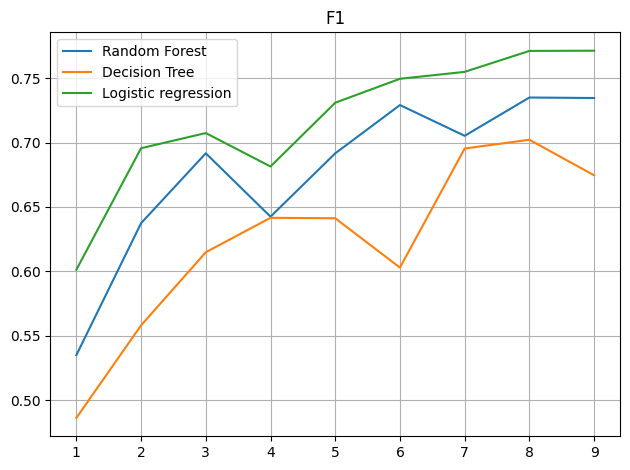

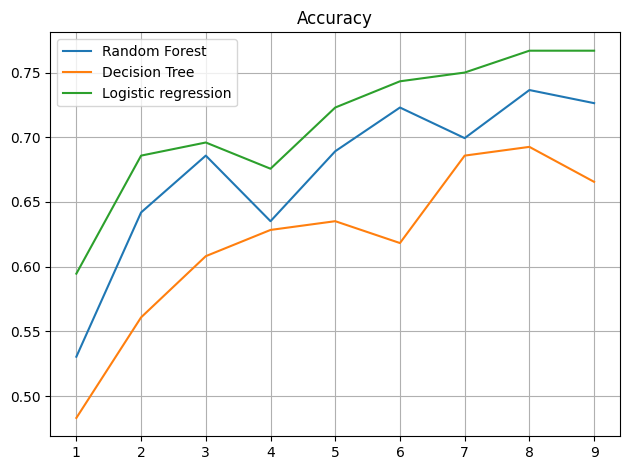

In [15]:
random_forest="Random Forest"
decision_tree="Decision Tree"
logistic_regression="Logistic regression"

def make_plot(rf, dt, lr, title):
    fig, ax = plt.subplots()
    ax.plot(training_parts, rf, label=random_forest)
    ax.plot(training_parts, dt, label=decision_tree)
    ax.plot(training_parts, lr, label=logistic_regression)
    ax.legend()
    ax.grid()
    plt.title(title)
    plt.tight_layout()
    plt.show()

make_plot(
    f1_rf, 
    f1_dt, 
    f1_lr, 
    'F1'
)

make_plot(
    accuracy_random_forest, 
    accuracy_decision_tree, 
    accuracy_logistic_regression, 
    'Accuracy'
)